# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

# By analyzing the data, try to find the parameters which have realtively large permutation importance and build the relationship between the paras and price.

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer 
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SequentialFeatureSelector

In [2]:
df = pd.read_csv('data/vehicles.csv')
df.head(10)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [3]:
df.shape

(426880, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [5]:
df.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [6]:
df.describe(include = 'object')

,region,manufacturer,model,condition,cylinders,fuel,title_status,transmission,VIN,drive,size,type,paint_color,state
count,426880,409234,421603,252776,249202,423867,418638,424324,265838,296313,120519,334022,296677,426880
unique,404,42,29649,6,8,5,6,3,118246,3,4,13,12,51
top,columbus,ford,f-150,good,6 cylinders,gas,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ca
freq,3608,70985,8009,121456,94169,356209,405117,336524,261,131904,63465,87056,79285,50614


In [7]:
#check if missing values

print(df.isnull().sum())

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64


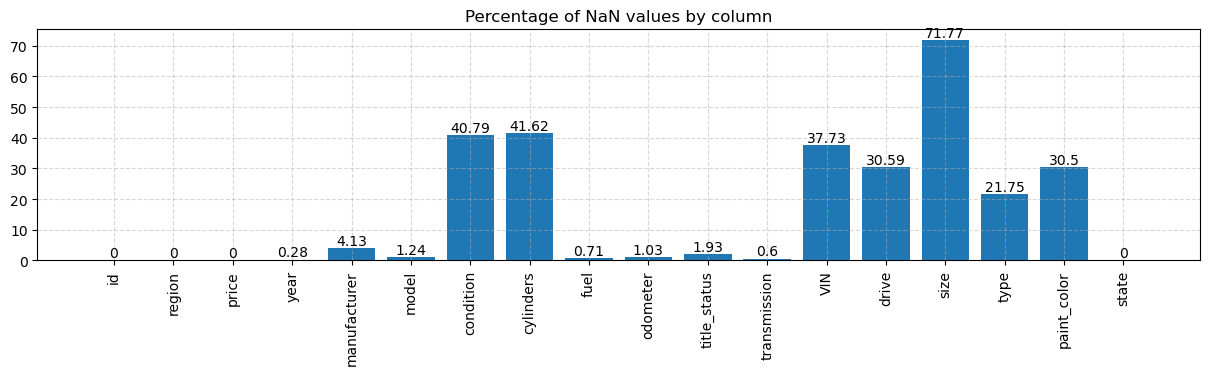

In [8]:
na_percentage = df.isna().sum()/df.shape[0]*100

fig ,ax = plt.subplots(figsize = [15,3])
bars = ax.bar(x=df.columns, height=round(na_percentage, 2))
ax.bar_label(bars)
ax.tick_params(axis='x', rotation=90)
ax.tick_params(axis='y')
plt.title("Percentage of NaN values by column")
plt.grid(linestyle="dashed", alpha=0.5)
plt.show()

<Axes: xlabel='price', ylabel='type'>

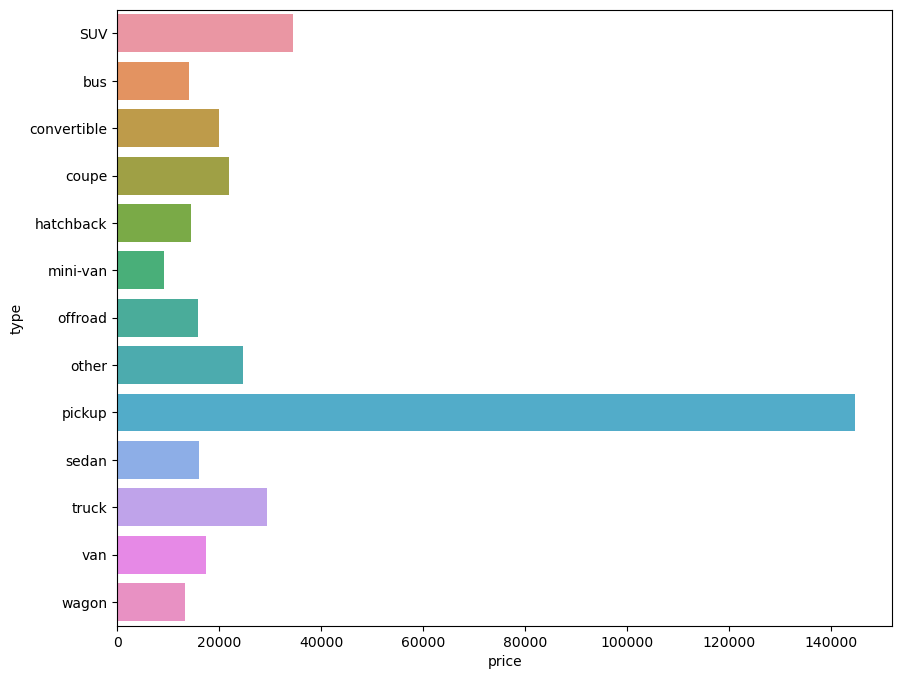

In [138]:
by_type =  df.groupby("type").size()

fig ,ax = plt.subplots(figsize = [10,8])
sns.barplot(y = by_type.index, x = df.groupby("type")['price'].mean())



###  which state has more used car ?

<Axes: ylabel='state'>

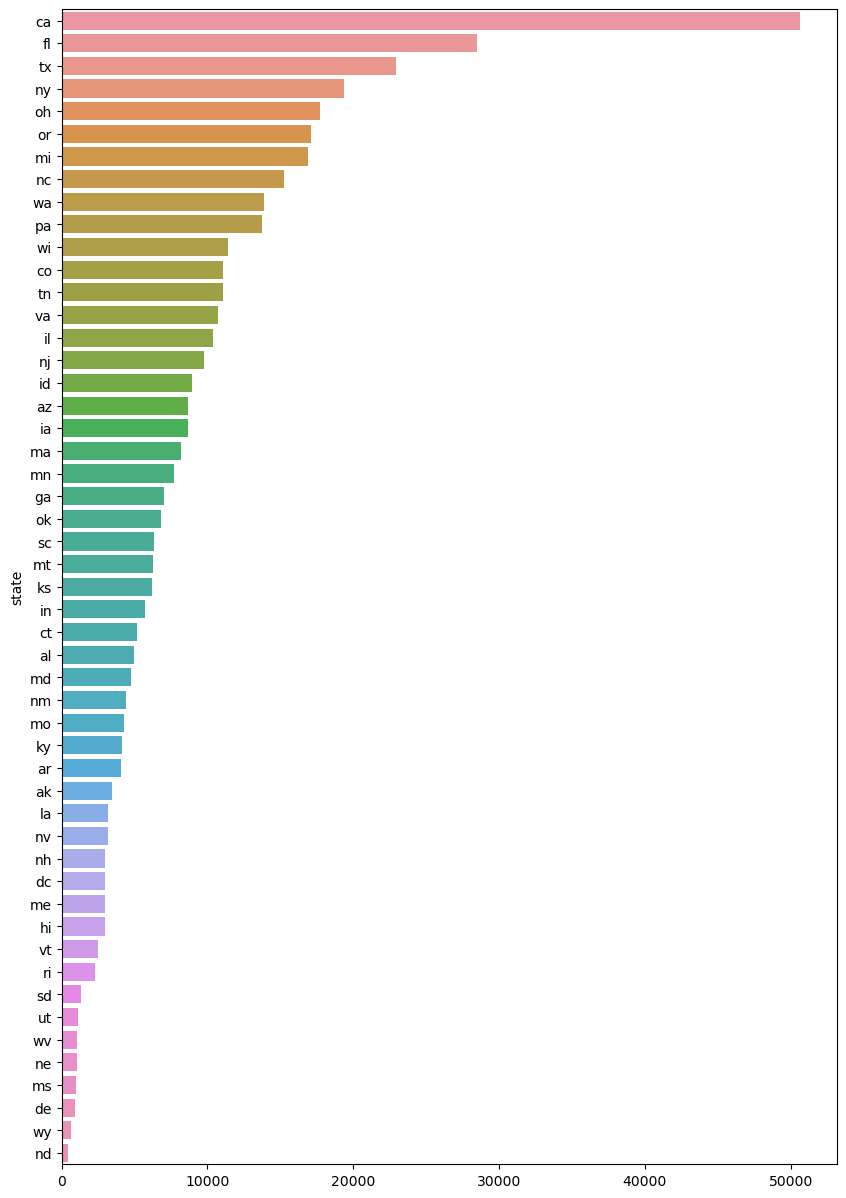

In [56]:
by_state = df.groupby("state").size()
by_state  = by_state.sort_values(ascending=False)

fig ,ax = plt.subplots(figsize = [10,15])
sns.barplot(y = by_state.index, x = by_state.values)




##  Califonia has the most used car number

<Axes: ylabel='manufacturer'>

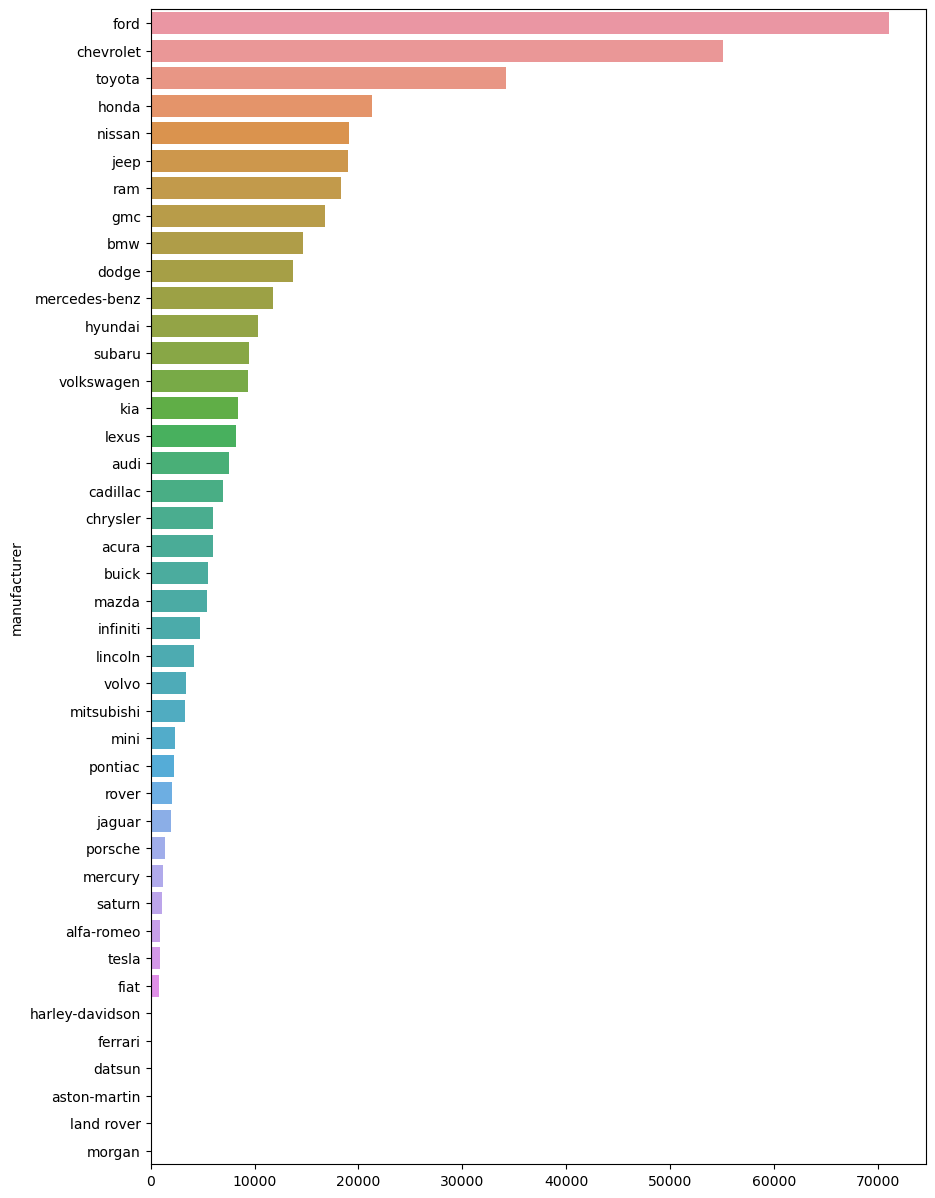

In [57]:
# what is the top 3 manufacturers

by_manuf =  df.groupby("manufacturer").size()
by_manuf  = by_manuf.sort_values(ascending=False)

fig ,ax = plt.subplots(figsize = [10,15])
sns.barplot(y = by_manuf.index, x = by_manuf.values)

# Ford, chevrolet and Toyota are the top 3 brands.

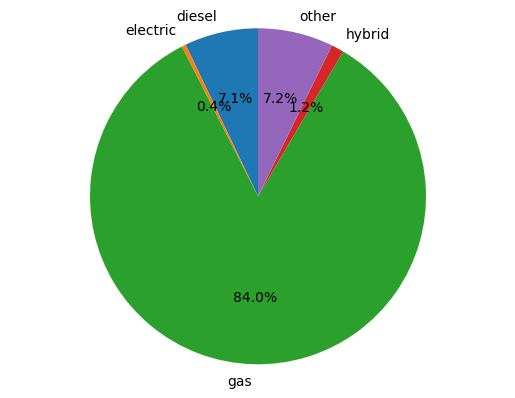

In [110]:
by_fuel =  df.groupby("fuel").size().dropna()
by_fuel = by_fuel/ by_fuel.values.sum()

fig1, ax1 = plt.subplots()
ax1.pie(by_fuel, labels=by_fuel.index, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

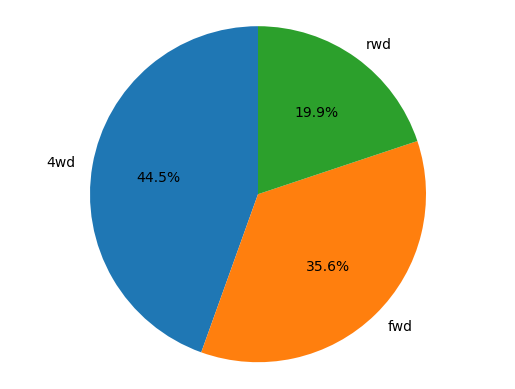

In [113]:
by_drive = df.groupby("drive").size().dropna()
by_drive = by_drive/ by_drive.values.sum()

fig1, ax1 = plt.subplots()
ax1.pie(by_drive, labels=by_drive.index, autopct='%1.1f%%', startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [114]:
# drop the column with a lot NAN value.

newdf = df.drop(['size', 'VIN','id','region'], axis = 1).dropna()

In [115]:
#next we only filter out the data in CA to 

dfca = newdf[newdf["state"] == "ca"].drop(['state'], axis = 1)
dfca 

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color
21174,11975,2003.0,harley-davidson,davidson,excellent,8 cylinders,gas,207000.0,clean,automatic,rwd,pickup,black
21176,21950,2003.0,chevrolet,silverado 3500,excellent,8 cylinders,diesel,202537.0,clean,automatic,4wd,truck,grey
21178,27590,2018.0,acura,tlx 3.5 sedan 4d,good,6 cylinders,gas,20420.0,clean,other,fwd,sedan,black
21185,3975,2006.0,pontiac,g6,excellent,4 cylinders,gas,187000.0,clean,automatic,fwd,sedan,silver
21187,32500,1987.0,volkswagen,vanagon,excellent,4 cylinders,gas,177313.0,clean,automatic,rwd,mini-van,blue
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71763,16590,2014.0,acura,rdx sport utility 4d,good,6 cylinders,gas,86919.0,clean,automatic,fwd,SUV,black
71764,41990,2019.0,lincoln,continental reserve,good,6 cylinders,gas,9345.0,clean,other,fwd,sedan,blue
71766,17590,2015.0,acura,rdx sport utility 4d,good,6 cylinders,gas,80556.0,clean,automatic,fwd,SUV,brown
71771,6250,2006.0,bmw,325i,like new,6 cylinders,gas,140000.0,clean,automatic,rwd,sedan,silver


In [116]:
dfca.loc[ dfca['price'] == 0 , 'price' ] = df['price'].median()
dfca = dfca.query('fuel != "other" and cylinders != "other"')


In [118]:
#create features and target

X = dfca.drop('price', axis = 1)
y = dfca['price']

#split the data to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True, train_size = 0.8, random_state = 32)
print('size of')
print('Train Set', X_train.shape[0])
print('Test Set', X_test.shape[0])


size of
Train Set 10004
Test Set 2502


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [119]:
dfca.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12506 entries, 21174 to 71772
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         12506 non-null  int64  
 1   year          12506 non-null  float64
 2   manufacturer  12506 non-null  object 
 3   model         12506 non-null  object 
 4   condition     12506 non-null  object 
 5   cylinders     12506 non-null  object 
 6   fuel          12506 non-null  object 
 7   odometer      12506 non-null  float64
 8   title_status  12506 non-null  object 
 9   transmission  12506 non-null  object 
 10  drive         12506 non-null  object 
 11  type          12506 non-null  object 
 12  paint_color   12506 non-null  object 
dtypes: float64(2), int64(1), object(10)
memory usage: 1.3+ MB


In [128]:
#seperate category featurea and numerical featuer
cat_features = ['manufacturer', 'fuel', 'title_status', 'transmission','drive', 'type', 'paint_color', 'model', 'condition', 'cylinders']
num_features = ['year', 'odometer']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')), 
    ('scaler', StandardScaler()),
    ('Polynormial', PolynomialFeatures(degree= 2, include_bias=False))
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),  
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])


# LinearRegresssion Model
LinearPipe = Pipeline([
    ('column_transform', preprocessor),
    ('linear', LinearRegression())
])

LinearPipe.fit(X_train,y_train)


#Print the selected features
print(LinearPipe)


train_mse = mean_squared_error(y_train, LinearPipe.predict(X_train))
test_mse = mean_squared_error(y_test, LinearPipe.predict(X_test))
# Print the MSE of the Ridge regression model
print(f"Linear Train MSE: {train_mse}")
print(f"Linear Test MSE: {test_mse}")

Pipeline(steps=[('column_transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('Polynormial',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one

In [129]:

LinearPipe

Pipeline(steps=[('column_transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('Polynormial',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['manufacturer', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color',
                                                   'model', 'condition',
                                                   'cylinders'])])),
                ('linear', LinearRegression())])

In [130]:
# Ridge Model
RidgePipe = Pipeline([
    ('column_transform', preprocessor),
    ('ridge', Ridge())
])

RidgePipe.fit(X_train,y_train)


#Print the selected features
print(RidgePipe)


train_mse = mean_squared_error(y_train, RidgePipe.predict(X_train))
test_mse = mean_squared_error(y_test, RidgePipe.predict(X_test))
# Print the MSE of the Ridge regression model
print(f"Ridge Train MSE: {train_mse}")
print(f"Ridge Test MSE: {test_mse}")

Pipeline(steps=[('column_transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('Polynormial',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('one

In [131]:
RidgePipe

Pipeline(steps=[('column_transform',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler()),
                                                                  ('Polynormial',
                                                                   PolynomialFeatures(include_bias=False))]),
                                                  ['year', 'odometer']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['manufacturer', 'fuel',
                                                   'title_status',
                                                   'transmission', 'drive',
                                                   'type', 'paint_color',
                                                   'model', 'condition',
                                                   'cylinders'])])),
                ('ridge', Ridge())])

In [132]:
# Calculate the permutation importance
perm_importance = permutation_importance(RidgePipe, X_test, y_test, n_repeats = 20, random_state = 42)
sorted_idx = perm_importance.importances_mean.argsort()[::-1] # [::-1] reverses the order of the array
# Print the feature importance scores
print("Feature importance scores (highest to lowest):")
for i in range(len(sorted_idx)):
    print(f"{X_test.columns[sorted_idx[i]]: >20}: {perm_importance.importances_mean[sorted_idx[i]]}")

Feature importance scores (highest to lowest):
                type: 4230.047229801947
               model: 3916.489971877157
               drive: 2906.4106408189537
                year: 395.3964206727054
        manufacturer: 256.48308138793436
           condition: 200.92301849435026
         paint_color: 135.76350741005808
        transmission: 54.22785200641156
            odometer: 33.647102980191995
        title_status: -10.496186979581399
           cylinders: -44.823010786719536
                fuel: -1161.3975414843248


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'type'),
  Text(1, 0, 'model'),
  Text(2, 0, 'drive'),
  Text(3, 0, 'year'),
  Text(4, 0, 'manufacturer'),
  Text(5, 0, 'condition'),
  Text(6, 0, 'paint_color'),
  Text(7, 0, 'transmission'),
  Text(8, 0, 'odometer'),
  Text(9, 0, 'title_status'),
  Text(10, 0, 'cylinders'),
  Text(11, 0, 'fuel')])

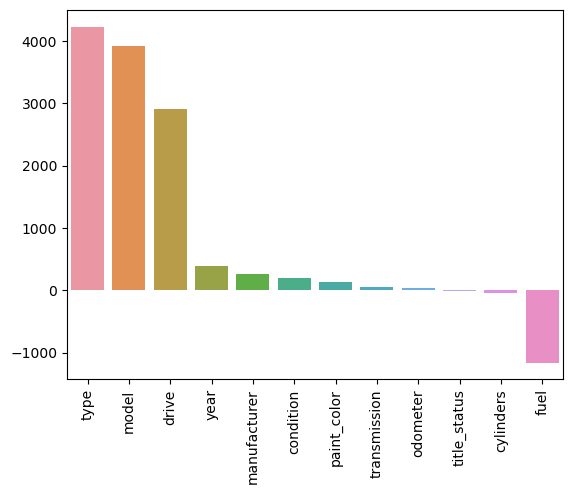

In [133]:

fig = sns.barplot(x=X_test.columns[sorted_idx], y=perm_importance.importances_mean[sorted_idx])
plt.xticks(rotation = 90)

In [ ]:
# Grid search


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

### The permutation importance and model coefficients show consistent in importance of the factors. In the degree of polynormial I tried both 1 and 2. The ridge model I also used default alpha value. I may go back again to test the model by using GridSearch to optimize the parameters.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

### After the testing above, it shows that 'type', 'model', 'drive' and 'fuel' are the most important factors affecting the used car price.
### All the features above will lead user to select one type of car. When the type of car is selected, 'year', 'manufacturer', 'condition' , 'paint_color' and all other factors will affect the price of the car.
